<a href="https://colab.research.google.com/github/V-Rang/Machine-Learning-Practice/blob/main/Boston_Housing_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
# raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO'])

raw_df = pd.read_csv(data_url,sep='\s+',skiprows=22,header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Model 1

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data,target,test_size=0.2)

In [5]:
tf.random.set_seed(1)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae,
              optimizer='SGD',
              metrics=['mae'])

model_1.fit(X_train,y_train,epochs=5)

Epoch 1/5
13/13 [==============================] - 2s 8ms/step - loss: 1355.7627 - mae: 1355.7627
Epoch 2/5
13/13 [==============================] - 0s 7ms/step - loss: 1520.8684 - mae: 1520.8684
Epoch 3/5
13/13 [==============================] - 0s 5ms/step - loss: 1434.2246 - mae: 1434.2246
Epoch 4/5
13/13 [==============================] - 0s 6ms/step - loss: 1494.5701 - mae: 1494.5701
Epoch 5/5
13/13 [==============================] - 0s 3ms/step - loss: 1450.7736 - mae: 1450.7736


In [6]:
from tensorflow.keras.utils import plot_model

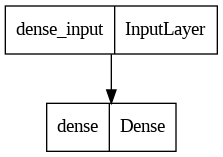

In [7]:
plot_model(model_1)

In [8]:
model_1_preds = model_1.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [9]:
y_test

array([37.3, 23.7, 48.8, 22.2, 19.4, 23.7, 19.2, 25.3, 43.1, 36.5, 18.6,
       17.8, 50. , 19.5, 13.1, 22.2, 20.1, 20.3, 50. , 20.5, 12.5, 14.4,
       22.3, 10.9, 23.4, 24.7, 18.3, 31.1, 13.6, 16.1, 10.2, 21.7, 11. ,
       32.5, 15.6, 23. , 16.2, 14.9, 22.5, 12.3, 30.7, 23.1, 31.5, 36.4,
       20.8, 37. , 20.9, 17.7, 50. , 19.8, 22.8, 26.4, 33.8, 50. , 23.2,
       16.6, 19.9, 25. , 19.9, 23.2, 18.5, 31.7, 18.2, 22.3, 26.7, 20.8,
        8.8, 10.2, 22.2, 20.2, 24.3, 32.4, 11.9, 23.7, 19.6, 17.4, 24. ,
       13.3, 29.8, 24.4, 20. , 22. , 13.5, 15.2, 18.7, 13.8, 50. , 16.4,
       24.5, 31.5, 21.5, 22. , 10.5, 19.8, 23.2, 13.8, 19.9, 15.6, 24.5,
       21.9, 21.1, 32.9])

In [10]:
model_1_preds

array([[2052.0764],
       [2872.6467],
       [2119.6233],
       [2091.5742],
       [2229.708 ],
       [2086.24  ],
       [2469.6494],
       [1970.9813],
       [2124.369 ],
       [2124.6748],
       [2338.1116],
       [2477.1582],
       [2388.019 ],
       [2896.951 ],
       [2088.7886],
       [2091.2192],
       [2191.3118],
       [2351.0442],
       [2304.6038],
       [1936.8838],
       [2908.9126],
       [2482.091 ],
       [2146.9197],
       [1381.4998],
       [2055.764 ],
       [2015.8969],
       [2374.855 ],
       [2064.2703],
       [2952.1848],
       [2856.806 ],
       [2906.518 ],
       [2085.7466],
       [1680.5791],
       [2035.1859],
       [2424.5957],
       [2879.4634],
       [2218.8223],
       [2394.5266],
       [2084.5618],
       [2914.7285],
       [2103.8787],
       [2140.6328],
       [2110.2307],
       [2316.0864],
       [2478.4783],
       [2260.2998],
       [2254.3818],
       [2878.2441],
       [2704.8752],
       [2215.777 ],


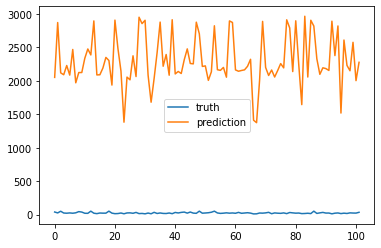

In [11]:
plt.plot(y_test,label='truth')
plt.plot(model_1_preds,label='prediction')
plt.legend();

In [12]:
len(y_test),len(model_1_preds)

(102, 102)

In [13]:
y_test.shape,model_1_preds.shape

((102,), (102, 1))

In [14]:
model_1_preds.reshape(len(model_1_preds)).shape

x1=  [1,2,3,4]
x2 = [4,5,6,7]
# model.evaluate(x1,x2)

In [15]:
model_1.evaluate(X_test,y_test)

4/4 [==============================] - 0s 4ms/step - loss: 2279.2117 - mae: 2279.2117


[2279.211669921875, 2279.211669921875]

In [16]:
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(model_1_preds))

mae

<tf.Tensor: shape=(), dtype=float32, numpy=2279.2117>

In [17]:
def maecalc(y_true,y_pred):
  return tf.metrics.mean_absolute_error(y_true,y_pred)

def msecalc(y_true,y_pred):
  return tf.metrics.mean_squared_error(y_true,y_pred)

In [18]:
maecalc(y_test,model_1_preds.reshape(len(model_1_preds)))

<tf.Tensor: shape=(), dtype=float32, numpy=2279.2117>

In [19]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((404, 13), (404,), (102, 13), (102,))

# Model 2

In [20]:
tf.random.set_seed(1)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['mae'])

model_2.fit(X_train,y_train,epochs=10)

model_2_preds = model_2.predict(X_test)

print(maecalc(y_test,model_2_preds.squeeze()))
print(msecalc(y_test,model_2_preds.squeeze()))

Epoch 1/10
13/13 [==============================] - 1s 12ms/step - loss: 89.7599 - mae: 89.7599
Epoch 2/10
13/13 [==============================] - 0s 10ms/step - loss: 9.0024 - mae: 9.0024
Epoch 3/10
13/13 [==============================] - 0s 8ms/step - loss: 9.4186 - mae: 9.4186
Epoch 4/10
13/13 [==============================] - 0s 5ms/step - loss: 9.6342 - mae: 9.6342
Epoch 5/10
13/13 [==============================] - 0s 6ms/step - loss: 9.9401 - mae: 9.9401
Epoch 6/10
13/13 [==============================] - 0s 9ms/step - loss: 9.9316 - mae: 9.9316
Epoch 7/10
13/13 [==============================] - 0s 9ms/step - loss: 8.7662 - mae: 8.7662
Epoch 8/10
13/13 [==============================] - 0s 8ms/step - loss: 8.1630 - mae: 8.1630
Epoch 9/10
13/13 [==============================] - 0s 6ms/step - loss: 8.7196 - mae: 8.7196
Epoch 10/10
4/4 [==============================] - 0s 5ms/step
tf.Tensor(6.6700764, shape=(), dtype=float32)
tf.Tensor(105.06414, shape=(), dtype=float32)


In [21]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape,

((404, 13), (102, 13), (404,), (102,))

In [22]:
model_1_preds = model_1.predict(X_test)
model_2_preds = model_2.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [23]:
print(maecalc(y_test,model_1_preds.reshape(len(model_1_preds))))
print(maecalc(y_test,model_2_preds.reshape(len(model_2_preds))))

tf.Tensor(2279.2117, shape=(), dtype=float32)
tf.Tensor(6.6700764, shape=(), dtype=float32)


In [24]:
print(msecalc(y_test,model_1_preds.reshape(len(model_1_preds))))
print(msecalc(y_test,model_2_preds.reshape(len(model_2_preds))))

tf.Tensor(5327774.0, shape=(), dtype=float32)
tf.Tensor(105.06414, shape=(), dtype=float32)


In [25]:
X_train[0].shape

(13,)

# Model 3

In [26]:
tf.random.set_seed(1)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(5,input_shape=(13,)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['mae'])

model_3.fit(X_train,y_train,epochs=10)

model_3_preds = model_3.predict(X_test)

print(maecalc(y_test,model_3_preds.squeeze()))
print(msecalc(y_test,model_3_preds.squeeze()))

Epoch 1/10
13/13 [==============================] - 1s 6ms/step - loss: 83.4451 - mae: 83.4451
Epoch 2/10
13/13 [==============================] - 0s 6ms/step - loss: 9.9622 - mae: 9.9622
Epoch 3/10
13/13 [==============================] - 0s 4ms/step - loss: 9.6314 - mae: 9.6314
Epoch 4/10
13/13 [==============================] - 0s 3ms/step - loss: 10.1453 - mae: 10.1453
Epoch 5/10
13/13 [==============================] - 0s 3ms/step - loss: 9.4408 - mae: 9.4408
Epoch 6/10
13/13 [==============================] - 0s 4ms/step - loss: 9.8765 - mae: 9.8765
Epoch 7/10
13/13 [==============================] - 0s 7ms/step - loss: 9.4143 - mae: 9.4143
Epoch 8/10
13/13 [==============================] - 0s 4ms/step - loss: 9.6082 - mae: 9.6082
Epoch 9/10
13/13 [==============================] - 0s 3ms/step - loss: 8.6970 - mae: 8.6970
Epoch 10/10
4/4 [==============================] - 0s 4ms/step
tf.Tensor(7.6767454, shape=(), dtype=float32)
tf.Tensor(122.21457, shape=(), dtype=float32)


In [27]:
# mae_mse_results = pd.DataFrame({"model","mse","mae"}).transpose()
# mae_mse_results['model_1'] = {maecalc(y_test,model_1_preds.reshape(len(model_1_preds))).numpy(),msecalc(y_test,model_1_preds.reshape(len(model_1_preds))).numpy()}
# # maecalc(y_test,model_1_preds.reshape(len(model_1_preds))).numpy()

mae_mse_results = pd.DataFrame([['model_1',maecalc(y_test,model_1_preds.reshape(len(model_1_preds))).numpy(),msecalc(y_test,model_1_preds.reshape(len(model_1_preds))).numpy()],
                                ['model_2',maecalc(y_test,model_2_preds.reshape(len(model_2_preds))).numpy(),msecalc(y_test,model_2_preds.reshape(len(model_2_preds))).numpy()],
                                ['model_3',maecalc(y_test,model_3_preds.reshape(len(model_3_preds))).numpy(),msecalc(y_test,model_3_preds.reshape(len(model_3_preds))).numpy()]],columns=['model','mae','mse'])
mae_mse_results

,model,mae,mse
0,model_1,2279.211670,5.327774e+06
1,model_2,6.670076,1.050641e+02
2,model_3,7.676745,1.222146e+02


In [28]:
# mae_mse_results = mae_mse_results.append({'model_4',1.4123,2.452})
# mae_mse_results = mae_mse_results.append(({'model_4',3.41,5.61}))

# df2 = pd.DataFrame([['model_4',3.412,5.6323]],columns=['model','mae','mse'])
# mae_mse_results.append(df2,ignore_index=True)
# mae_mse_results.append(df2)

# mae_mse_results = mae_mse_results.append( pd.DataFrame([[ 'model_',maecalc(y_test,model_)     ]],columns=['model','mae','mse'])   )

# mae_mse_results.append( pd.DataFrame([['model_5',5.63234,55656]],columns=['model','mae','mse']),ignore_index=True)

# Model 4

In [29]:
tf.random.set_seed(1)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(5,input_shape=(13,)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_4.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['mae'])

model_4.fit(X_train,y_train,epochs=10)

model_4_preds = model_3.predict(X_test)

print(maecalc(y_test,model_4_preds.squeeze()))
print(msecalc(y_test,model_4_preds.squeeze()))

Epoch 1/10
13/13 [==============================] - 1s 5ms/step - loss: 67.7336 - mae: 67.7336
Epoch 2/10
13/13 [==============================] - 0s 4ms/step - loss: 13.7008 - mae: 13.7008
Epoch 3/10
13/13 [==============================] - 0s 4ms/step - loss: 10.3138 - mae: 10.3138
Epoch 4/10
13/13 [==============================] - 0s 8ms/step - loss: 11.6465 - mae: 11.6465
Epoch 5/10
13/13 [==============================] - 0s 6ms/step - loss: 9.3686 - mae: 9.3686
Epoch 6/10
13/13 [==============================] - 0s 4ms/step - loss: 10.0375 - mae: 10.0375
Epoch 7/10
13/13 [==============================] - 0s 3ms/step - loss: 9.2440 - mae: 9.2440
Epoch 8/10
13/13 [==============================] - 0s 6ms/step - loss: 9.8145 - mae: 9.8145
Epoch 9/10
13/13 [==============================] - 0s 4ms/step - loss: 7.9670 - mae: 7.9670
Epoch 10/10
4/4 [==============================] - 0s 3ms/step
tf.Tensor(7.6767454, shape=(), dtype=float32)
tf.Tensor(122.21457, shape=(), dtype=float32

In [30]:
mae_mse_results = mae_mse_results.append( pd.DataFrame([[ 'model_4',maecalc(y_test,model_4_preds.reshape(len(model_4_preds))).numpy(),msecalc(y_test,model_4_preds.reshape(len(model_4_preds))).numpy()  ]],columns=['model','mae','mse'])   )


In [31]:
mae_mse_results

,model,mae,mse
0,model_1,2279.211670,5.327774e+06
1,model_2,6.670076,1.050641e+02
2,model_3,7.676745,1.222146e+02
0,model_4,7.676745,1.222146e+02


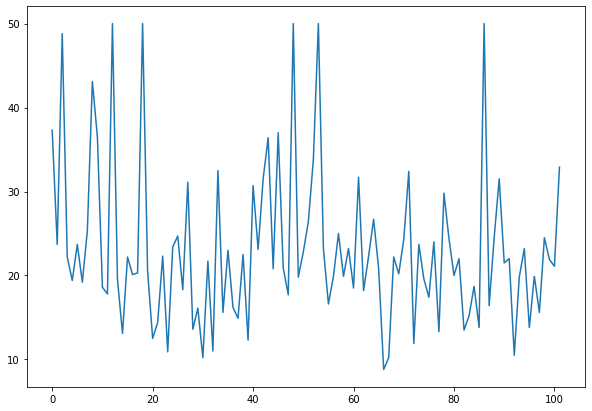

In [32]:
plt.figure(figsize=(10,7))
plt.plot(y_test)
# plt.plot(model_1_preds);

In [33]:
x = f'model_1_preds'
for i in range(1,5):
  print(eval(f'model_{i}_preds[0]'))

[2052.0764]
[24.45924]
[21.6709]
[21.6709]


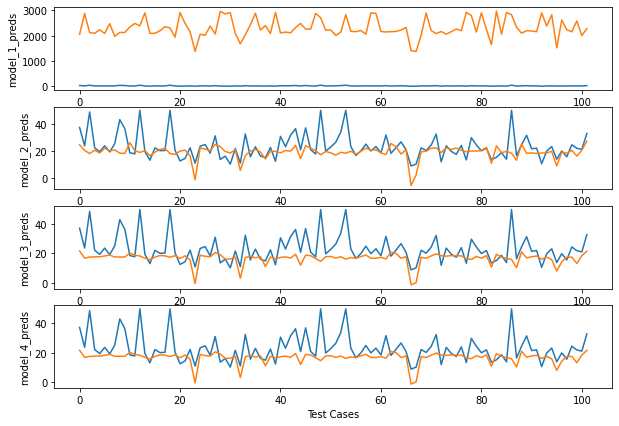

In [34]:
fig,ax = plt.subplots(len(mae_mse_results),1,figsize=(10,7))
i = 1
for axes in ax:
  axes.plot(y_test)
  axes.plot(eval(f'model_{i}_preds'))
  axes.set_xlabel('Test Cases')
  axes.set_ylabel(f'model_{i}_preds')
  i += 1

# Model 5

In [35]:
tf.random.set_seed(1)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(5,input_shape=(13,)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_5.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['mae'])

model_5.fit(X_train,y_train,epochs=100)

model_5_preds = model_3.predict(X_test)

print(maecalc(y_test,model_5_preds.squeeze()))
print(msecalc(y_test,model_5_preds.squeeze()))

Epoch 1/100
13/13 [==============================] - 1s 4ms/step - loss: 65.6290 - mae: 65.6290
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 9.3731 - mae: 9.3731
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 10.5036 - mae: 10.5036
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 10.4330 - mae: 10.4330
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 8.7177 - mae: 8.7177
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 8.1377 - mae: 8.1377
Epoch 7/100
13/13 [==============================] - 0s 7ms/step - loss: 9.0723 - mae: 9.0723
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 8.6363 - mae: 8.6363
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 8.8407 - mae: 8.8407
Epoch 10/100
13/13 [==============================] - 0s 4ms/step - loss: 8.4455 - mae: 8.4455
Epoch 11/100
13/13 [==============================] -

In [36]:
mae_mse_results = mae_mse_results.append(pd.DataFrame([['model_5',maecalc(y_test,model_5_preds.reshape(len(model_5_preds))).numpy(), msecalc(y_test,model_5_preds.reshape(len(model_5_preds))).numpy()   ]],columns=['model','mae','mse']   ))

In [37]:
mae_mse_results

,model,mae,mse
0,model_1,2279.211670,5.327774e+06
1,model_2,6.670076,1.050641e+02
2,model_3,7.676745,1.222146e+02
0,model_4,7.676745,1.222146e+02
0,model_5,7.676745,1.222146e+02


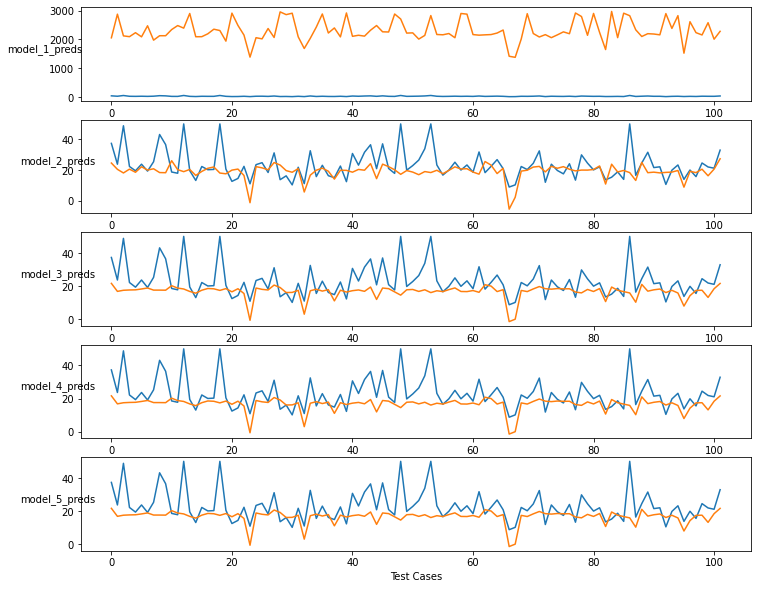

In [38]:
fig,ax = plt.subplots(len(mae_mse_results),1,figsize=(12,10))
i = 1
for axes in ax:
  axes.plot(y_test)
  axes.plot(eval(f'model_{i}_preds'))
  axes.set_xlabel('Test Cases')
  axes.set_ylabel(f'model_{i}_preds',rotation=0,loc='center')
  i += 1

In [39]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 5)                 70        
                                                                 
 dense_10 (Dense)            (None, 10)                60        
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


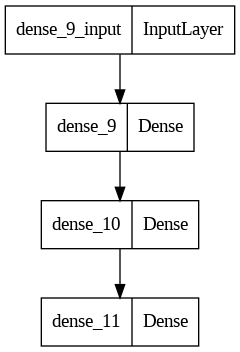

In [40]:
plot_model(model_5)

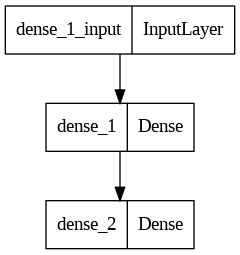

In [41]:
plot_model(model_2)

In [42]:
model_2.save("best_model_HDF5.h5")

In [43]:
loaded_save_model = tf.keras.models.load_model('best_model_HDF5.h5')
loaded_save_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 5)                 70        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 76
Trainable params: 76
Non-trainable params: 0
_________________________________________________________________


In [44]:
len(data),len(data[0])

(506, 13)

In [45]:
tf.random.set_seed(1)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['mae'])

history_model_2 = model_2.fit(X_train,y_train,epochs=10,verbose=0)

model_2_preds = model_2.predict(X_test)

print(maecalc(y_test,model_2_preds.squeeze()))
print(msecalc(y_test,model_2_preds.squeeze()))

4/4 [==============================] - 0s 3ms/step
tf.Tensor(6.657832, shape=(), dtype=float32)
tf.Tensor(101.480705, shape=(), dtype=float32)


In [46]:
tf.random.set_seed(1)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['mae'])

history_model_2 = model_2.fit(X_train,y_train,epochs=100,verbose=0)

model_2_preds = model_2.predict(X_test)

print(maecalc(y_test,model_2_preds.squeeze()))
print(msecalc(y_test,model_2_preds.squeeze()))

4/4 [==============================] - 0s 3ms/step
tf.Tensor(8.094555, shape=(), dtype=float32)
tf.Tensor(97.52008, shape=(), dtype=float32)


In [47]:
history_model_2.history

{'loss': [85.99523162841797,
  8.908710479736328,
  9.013162612915039,
  9.446736335754395,
  9.349034309387207,
  9.00407600402832,
  7.981431007385254,
  8.651546478271484,
  8.130616188049316,
  9.967076301574707,
  9.223798751831055,
  8.007865905761719,
  8.283690452575684,
  9.439334869384766,
  8.96688461303711,
  9.312118530273438,
  8.235663414001465,
  8.362330436706543,
  8.449508666992188,
  10.30873966217041,
  8.954534530639648,
  8.921126365661621,
  9.149909973144531,
  7.914449214935303,
  8.553132057189941,
  7.671316623687744,
  7.904815196990967,
  8.390554428100586,
  9.060561180114746,
  8.511375427246094,
  8.454925537109375,
  9.682496070861816,
  8.565254211425781,
  8.833161354064941,
  8.283638954162598,
  8.542680740356445,
  9.362868309020996,
  8.947253227233887,
  7.122748851776123,
  9.717277526855469,
  9.102133750915527,
  8.108597755432129,
  8.090981483459473,
  9.070755958557129,
  8.521261215209961,
  9.237760543823242,
  8.6002779006958,
  9.28453

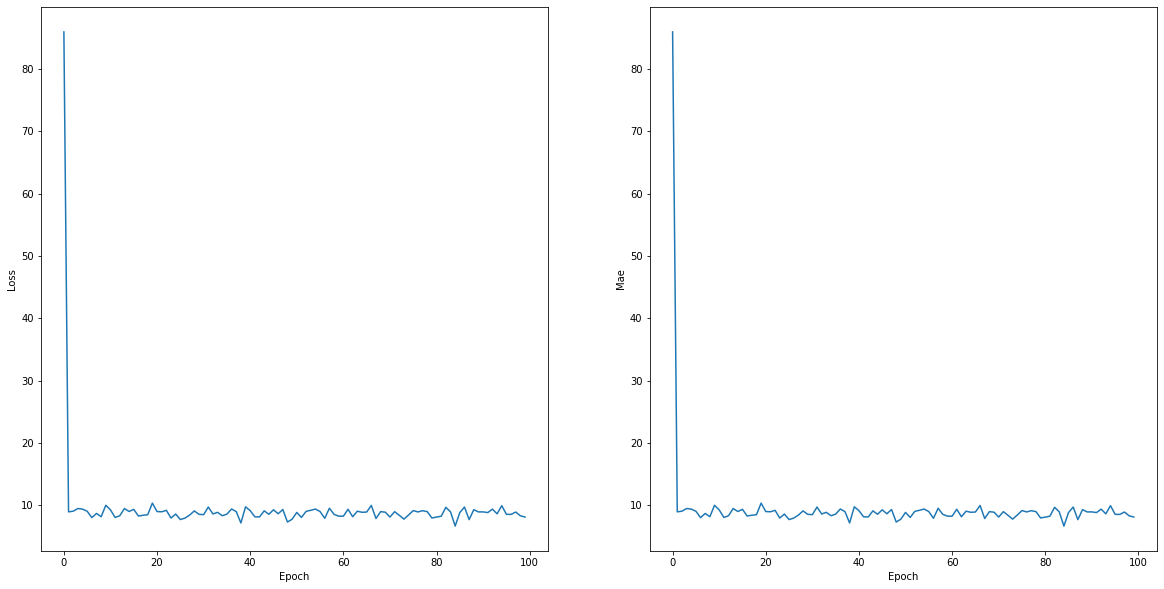

In [48]:
fig,ax = plt.subplots(1,2,figsize=(20,10))

ax[0].plot(history_model_2.history['loss'])
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')

ax[1].plot(history_model_2.history['mae'])
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Mae');

In [49]:
test = [[1,2,3],
        [4,5,6]]
import sklearn
scaler = sklearn.preprocessing.StandardScaler().fit(test)
scaler.mean_, scaler.scale_,scaler.n_features_in_,scaler.n_samples_seen_,scaler.get_feature_names_out

(array([2.5, 3.5, 4.5]),
 array([1.5, 1.5, 1.5]),
 3,
 2,
 <bound method OneToOneFeatureMixin.get_feature_names_out of StandardScaler()>)

# Normalizing data before training

In [50]:
column_names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']

In [51]:
training_data = pd.DataFrame(data,columns=column_names)

In [52]:
training_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [53]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler

ct = make_column_transformer(
    (MinMaxScaler(),column_names)
)

X_train,X_test,y_train,y_test = train_test_split(training_data,target,test_size=0.2)
ct.fit(X_train)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [54]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
80,0.04113,25.0,4.86,0.0,0.426,6.727,33.5,5.4007,4.0,281.0,19.0,396.90,5.29
339,0.05497,0.0,5.19,0.0,0.515,5.985,45.4,4.8122,5.0,224.0,20.2,396.90,9.74
178,0.06642,0.0,4.05,0.0,0.510,6.860,74.4,2.9153,5.0,296.0,16.6,391.27,6.92
482,5.73116,0.0,18.10,0.0,0.532,7.061,77.0,3.4106,24.0,666.0,20.2,395.28,7.01
364,3.47428,0.0,18.10,1.0,0.718,8.780,82.9,1.9047,24.0,666.0,20.2,354.55,5.29


In [55]:
X_train.shape,X_train_normal.shape

((404, 13), (404, 13))

In [56]:
X_train_normal.shape

(404, 13)

In [57]:
max(X_train_normal[:,0])

1.0

In [58]:
tf.random.set_seed(1)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

model_6.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['mae'])

history_model_6 = model_6.fit(X_train_normal,y_train,epochs=100,verbose=0)

model_6_preds = model_6.predict(X_test_normal)

print(maecalc(y_test,model_6_preds.squeeze()))
print(msecalc(y_test,model_6_preds.squeeze()))

4/4 [==============================] - 0s 3ms/step
tf.Tensor(7.3774037, shape=(), dtype=float32)
tf.Tensor(92.56793, shape=(), dtype=float32)


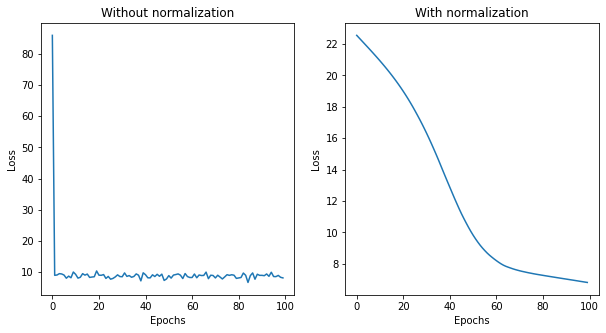

In [101]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(history_model_2.history['loss'])
ax[0].set_title('Without normalization')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[1].plot(history_model_6.history['loss'])
ax[1].set_title('With normalization')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss');

In [105]:
maecalc(y_test,model_2_preds.squeeze()).numpy(),maecalc(y_test,model_6_preds.squeeze()).numpy()

(8.819822, 7.3774037)

In [106]:
msecalc(y_test,model_2_preds.squeeze()).numpy(),msecalc(y_test,model_6_preds.squeeze()).numpy()

(110.18404, 92.56793)